# Usability test of a Web-based AR App

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Read CSV file with he responses
data = pd.read_csv('lrp_v2.csv', sep=';')

# Make a copy in order to preserve the original.
data_copy = data.copy()
data_copy

,Sukupuoli,Ikä,Siviilisääty,Koulutus,SUS1,SUS2,SUS3,SUS4,SUS5,SUS6,SUS7,SUS8,SUS9,SUS10,ARS,Oletko käyttänyt jotain AR-sovellusta aiemmin?,Kuinka tämän AR-sovelluksen käyttö oli verrattavissa muihin käyttämiisi AR -sovelluksiin?,"Oletko fyysisesti aktiivinen säännöllisesti? (Liikut, harjoittelet tai urheilet säännöllisesti)",Kuinka monta tuntia olet fyysisesti aktiivinen viikoittain?: Tuntia
0,Female,41-50 v,Naimisissa,Ammattilainen tutkinto,5,2,5,2,5,2,5,1,5,2,7,Ei,NaN,Kyllä,3
1,Male,31-40 v,Naimaton/Sinkku,Korkeakoulututkinto,5,1,5,1,4,1,5,1,4,3,5,Kyllä,NaN,Kyllä,3
2,Male,Utmost 20 v,Naimaton/Sinkku,Peruskoulu,4,4,1,1,4,5,4,4,1,4,4,Ei,NaN,Kyllä,20
3,Female,41-50 v,Naimisissa,Korkeakoulututkinto,2,4,3,1,3,3,5,1,5,1,3,Ei,NaN,Kyllä,5.Jul
4,Male,61+ v,Naimisissa,Korkeakoulututkinto,3,2,4,1,4,2,4,2,4,1,7,Ei,NaN,Ei,14
5,Female,31-40 v,Naimisissa,Ammattikoulu,4,2,2,1,5,2,5,1,5,2,5,Ei,NaN,Kyllä,5
6,Female,61+ v,Naimisissa,Korkeakoulututkinto,2,4,2,4,1,5,4,4,2,3,3,Ei,NaN,Kyllä,5.Jun
7,Female,41-50 v,Naimisissa,Korkeakoulututkinto,5,1,5,1,5,1,5,1,5,1,7,Kyllä,Helpompaa,Kyllä,8
8,Male,41-50 v,Naimisissa,Ammattikoulu,3,3,3,1,5,1,5,1,3,1,4,Ei,NaN,Kyllä,6.Aug
9,Male,31-40 v,Naimisissa,Kandidaatintutkinto,1,5,1,1,2,5,3,5,1,1,1,Kyllä,Ohjelma ei toiminut kunnolla. Koodien skannaam...,Kyllä,6


/Users/moduor/anaconda3/envs/data_science/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/moduor/anaconda3/envs/data_science/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.10, the latest is 0.3.11.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Calculating SUS Scores
To calculate the SUS score, first sum the score contributions from each item. Each item's score contribution will range from 0 to 4. For items 1,3,5,7 and 9, the score contribution is the scale position minus 1. For items 2,4,6,8 and 10, the contribution is 5 minus the scale position. Multiply the sum of the scores by 2.5 to obtain the overall value of SUS. SUS scores have a range of 0 to 100, where the higher the value, the higher level of usability.

Brooke, J. (1996). SUS - A quick and dirty usability scale. Usability evaluation in industry, 189(194), 4-7

In [3]:
# Create a list to store the data
sus = []

# For each row in the column,
for index, row in data_copy.iterrows():
    odd = (row['SUS1'] + row['SUS3'] + row['SUS5'] + row['SUS7'] + row['SUS9']) - 5
    even = 25 - (row['SUS2'] + row['SUS4'] + row['SUS6'] + row['SUS8'] + row['SUS10'])
    sus_scores = (odd + even) * 2.5
    sus.append(sus_scores)
    print(sus_scores)

90.0
90.0
40.0
70.0
77.5
82.5
27.5
100.0
80.0
27.5
80.0
52.5
80.0


In [7]:
# Add the SUS scores column to the dataframe
data_copy['SUS Scores'] = sus

In [8]:
# Rename the ARS column
data_copy.rename(columns = {'ARS': 'Adjective Rating'}, inplace = True)
#data_copy

In [9]:
# Summary statistics for the SUS scores
data_copy['SUS Scores'].describe().round(2)

count     13.00
mean      69.04
std       24.19
min       27.50
25%       52.50
50%       80.00
75%       82.50
max      100.00
Name: SUS Scores, dtype: float64

In [10]:
# Summary statistics for the Adjective Rating Scale 
data_copy['Adjective Rating'].describe().round(2)

count    13.00
mean      4.69
std       1.89
min       1.00
25%       4.00
50%       4.00
75%       7.00
max       7.00
Name: Adjective Rating, dtype: float64

## Correlation
Calculating the correlation between SUS Scores and the adjective rating scale - a correlational analysis to reveal how well the SUS scores match with the adjective rating scale as describe in [Bangor, Kortum and Miller (2009)](https://uxpajournal.org/determining-what-individual-sus-scores-mean-adding-an-adjective-rating-scale/). 

In [15]:
# Calculating the correlation between SUS Scores and the Adjective Rating Scale
pg.corr(x=data_copy['SUS Scores'], y=data_copy['Adjective Rating'], method='spearman').round(3)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,13,0.755,"[0.35, 0.92]",0.57,0.484,0.003,18.537,0.893


The results are inline with earlier findings showing a positive correlation between the SUS scores and the adjective rating scale (r = 0.75). 

<AxesSubplot:xlabel='SUS Scores', ylabel='Adjective Rating'>

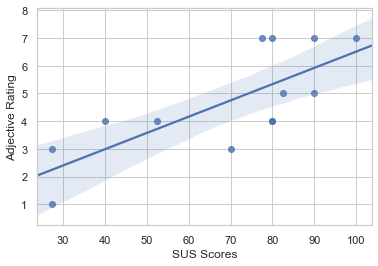

In [21]:
# Plotting with 95% CI and the regression line extended to the axis limits
sns.set(style="whitegrid")
sns.regplot(x="SUS Scores",
            y="Adjective Rating",
            data=data_copy,
            ci=95,
            truncate=False)

In [16]:
# Read CSV file with he responses
games = pd.read_csv('data1.csv', sep=';')

# Make a copy 
games_copy = games.copy()
games_copy

,Checkpoint,Downloads
0,1,22
1,2,24
2,3,29
3,4,33
4,5,29
5,6,93
6,7,36
7,8,132
8,9,14
9,10,13


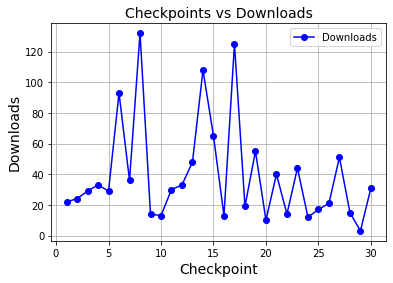

In [20]:
# Line chart pandas
games_copy.plot( x='Checkpoint', y='Downloads', kind='line', color='blue', marker='o')
plt.title('Checkpoints vs Downloads', fontsize=14)
plt.xlabel('Checkpoint', fontsize=14)
plt.ylabel('Downloads', fontsize=14)
plt.grid(True)
plt.show()

